In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict, Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
Rating=pd.read_csv('Reviews.csv',encoding='latin-1')
Rating.head()

,Unnamed: 0,Ratings,Full_review
0,0,5,Good product as used of now.... Everything is ...
1,1,5,AWESOME LAPTOP. It supports many high spec gam...
2,2,4,For the peoples who R going to buy R they buye...
3,3,5,It's good gameing laptop in this price Display...
4,4,4,Best laptop in this price range... Believe me ...


In [3]:
#dropping the Unnamed: 0 column
Rating.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
Rating.shape

(33294, 2)

Here we can see we have 33294 rows and 2 columns

In [5]:
Rating.columns

Index(['Ratings', 'Full_review'], dtype='object')

here we can see the column of the datasets

In [6]:
Rating.dtypes

Ratings         int64
Full_review    object
dtype: object

here we can see we have object and integer type of datatypes

In [7]:
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33294 entries, 0 to 33293
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      33294 non-null  int64 
 1   Full_review  33294 non-null  object
dtypes: int64(1), object(1)
memory usage: 520.3+ KB


here we can see we dont have any null value present in our dataset

In [8]:
Rating.isnull().sum()

Ratings        0
Full_review    0
dtype: int64

No null value is there

<AxesSubplot:>

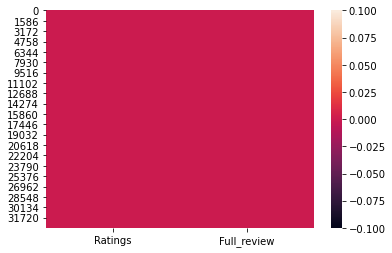

In [9]:
sns.heatmap(Rating.isnull())

plot grph to see the null values

In [11]:
Rating.nunique()

Ratings            5
Full_review    17186
dtype: int64

here we can see unique values of datasets

In [12]:
#convert text to lowercase
Rating['Full_review']=Rating['Full_review'].str.lower()

In [13]:
Rating['Full_review']=Rating['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'£|\$', 'dollers')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Rating['Full_review']=Rating['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [14]:
Rating['Full_review']=Rating['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'£|\$', 'dollers')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Rating['Full_review']=Rating['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [16]:
Rating['length']=Rating.Full_review.str.len()
Rating.head()

,Ratings,Full_review,length
0,5,good product as used of now.... everything is ...,271
1,5,awesome laptop. it supports many high spec gam...,100
2,4,for the peoples who r going to buy r they buye...,531
3,5,it's good gameing laptop in this price display...,106
4,4,best laptop in this price range... believe me ...,523


In [17]:
Rating.head()

,Ratings,Full_review,length
0,5,good product as used of now.... everything is ...,271
1,5,awesome laptop. it supports many high spec gam...,100
2,4,for the peoples who r going to buy r they buye...,531
3,5,it's good gameing laptop in this price display...,106
4,4,best laptop in this price range... believe me ...,523


In [19]:
Rating['clean_length'] = Rating.Full_review.str.len()

In [20]:
Rating.head()

,Ratings,Full_review,length,clean_length
0,5,good product as used of now.... everything is ...,271,271
1,5,awesome laptop. it supports many high spec gam...,100,100
2,4,for the peoples who r going to buy r they buye...,531,531
3,5,it's good gameing laptop in this price display...,106,106
4,4,best laptop in this price range... believe me ...,523,523


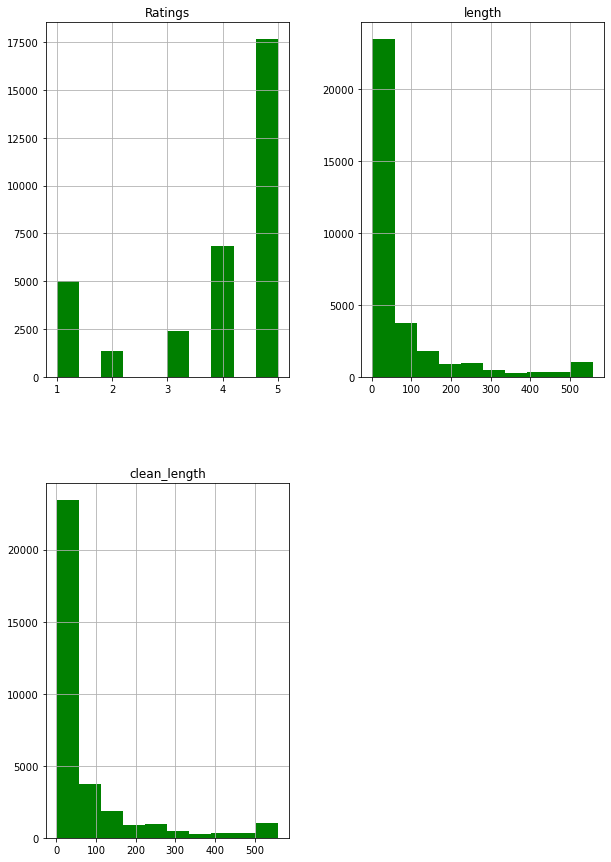

In [43]:
Rating.hist(figsize=(10,15),color = 'green');

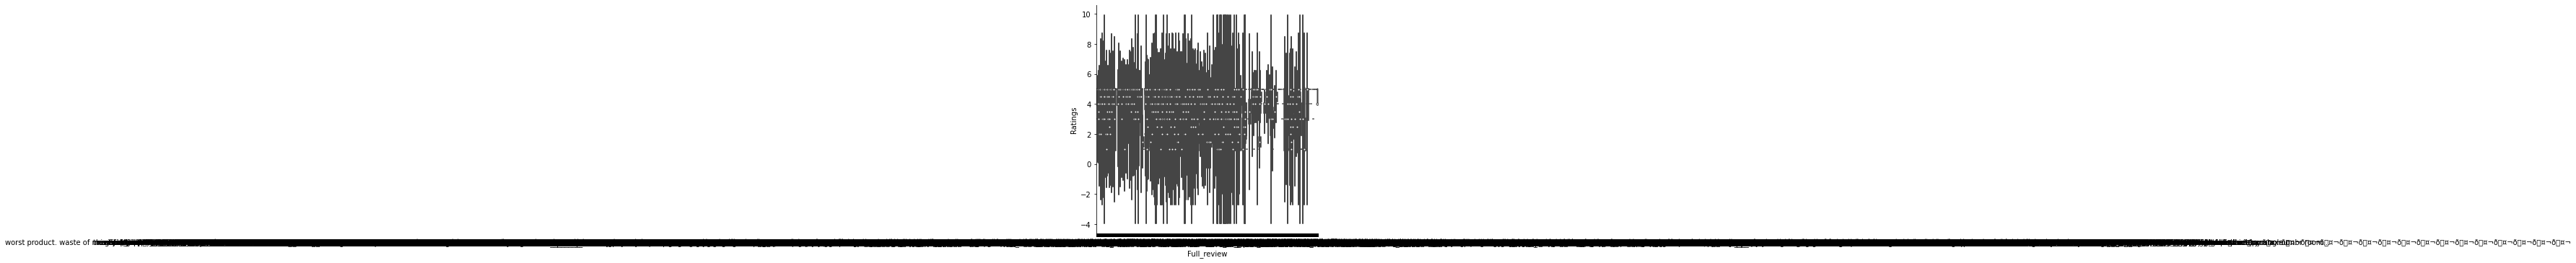

In [44]:
#Set up a category plot
g=sns.catplot(x="Full_review",y="Ratings",data=Rating,kind="violin")
#show plot
plt.show()

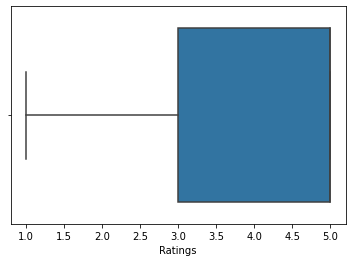

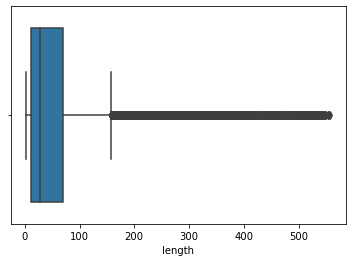

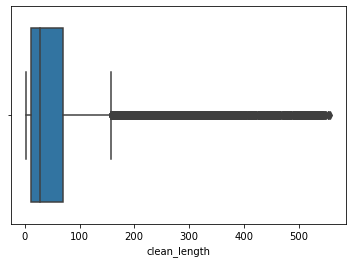

In [42]:
for i in Rating.describe().columns:
    sns.boxplot(Rating[i])
    plt.show()

Here we camn see except Ratings all have outliers present

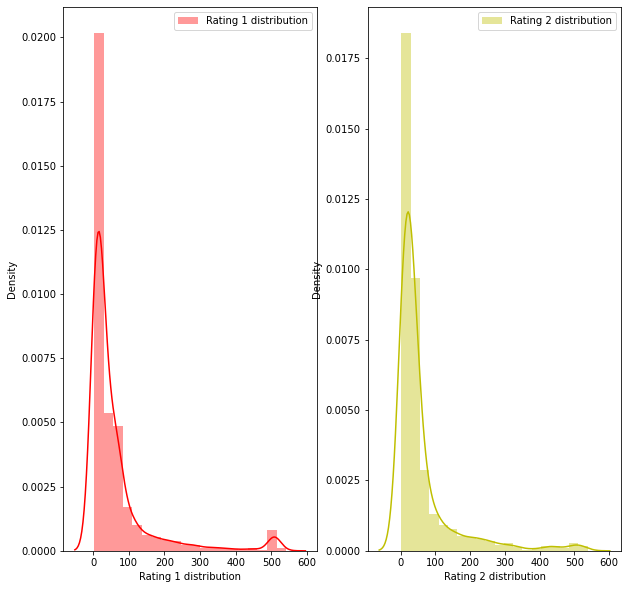

In [22]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

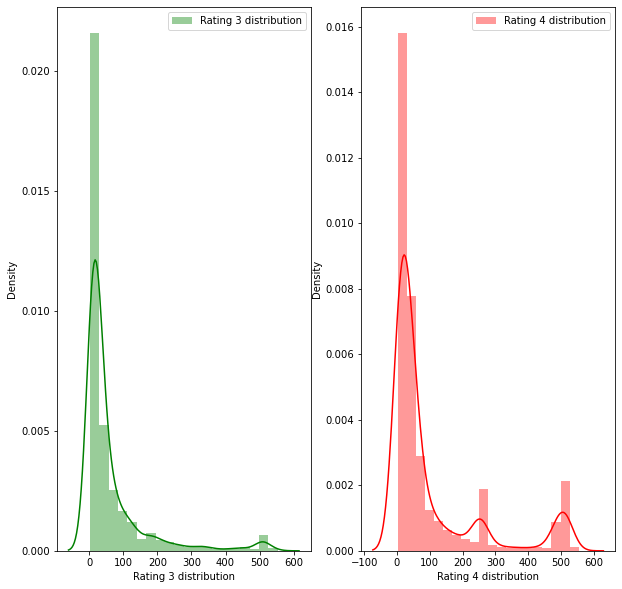

In [23]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

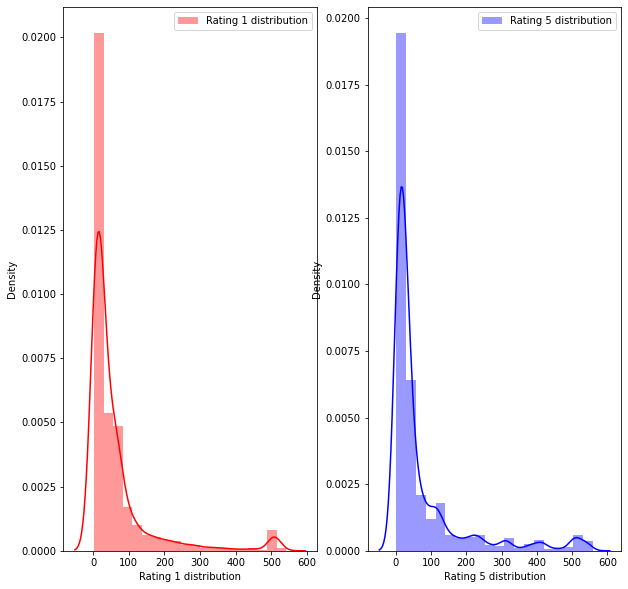

In [24]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

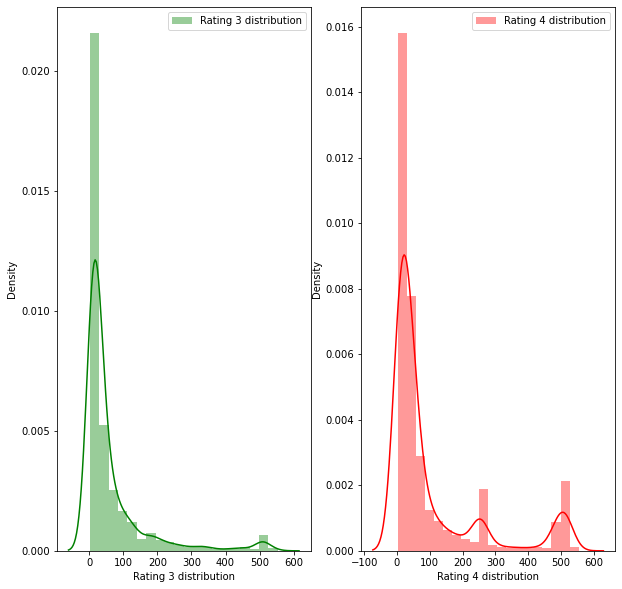

In [25]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

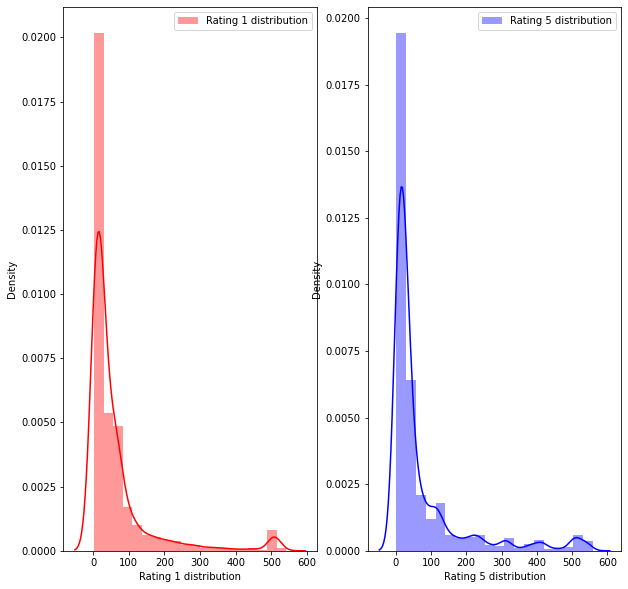

In [26]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['clean_length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

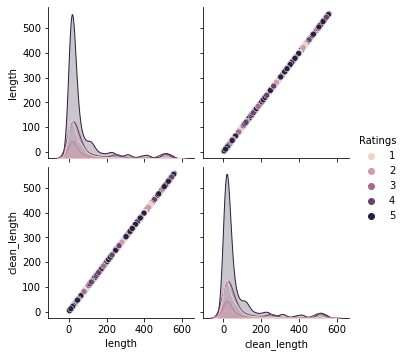

In [41]:
sns.pairplot(Rating,hue="Ratings")

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(Rating['Full_review'])

In [29]:
x=feature1
y=Rating['Ratings']

In [30]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

In [33]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [34]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)

RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))

models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.5973869950443009


Cross_Val_Score =  0.5168825960234792


classification_report
               precision    recall  f1-score   support

           1       0.48      0.50      0.49       987
           2       0.57      0.24      0.33       263
           3       0.40      0.23      0.29       477
           4       0.48      0.45      0.46      1399
           5       0.68      0.76      0.72      3533

    accuracy                           0.60      6659
   macro avg       0.52      0.43      0.46      6659
weighted avg       0.58      0.60      0.59      6659



[[ 493   18   27  109  340]
 [  55   62   12   42   92]
 [  73    8  108   65  223]
 [ 121    4   54  629  591]
 [ 287   17   69  474 2686]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeCl

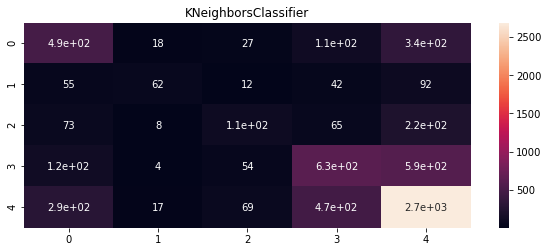

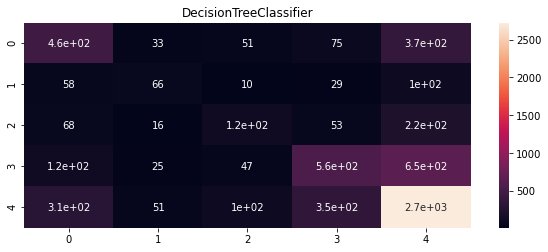

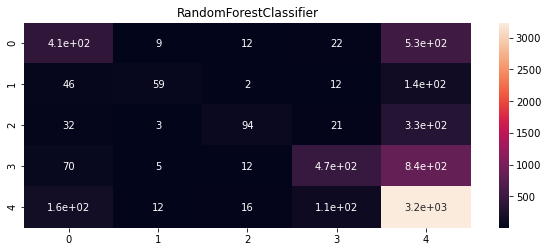

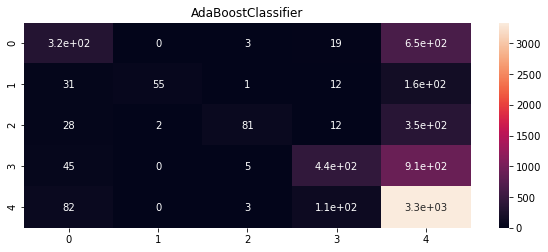

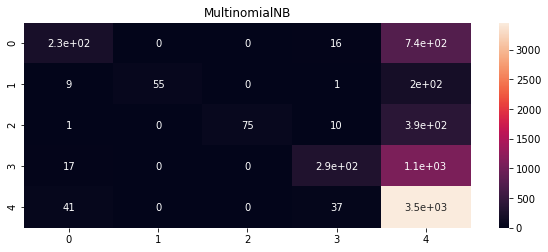

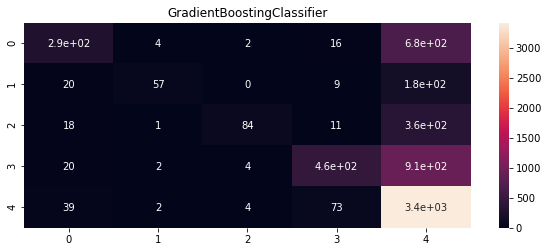

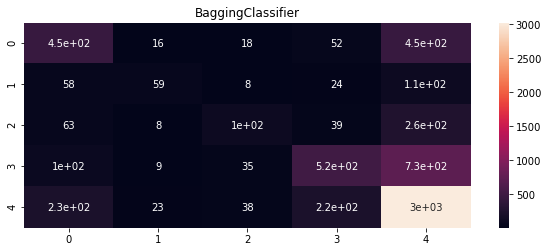

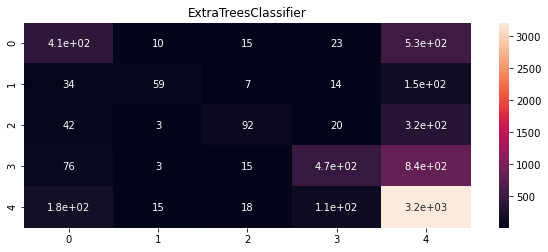

In [36]:
Model= []
score= []
cvs=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

In [37]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,59.738700,51.688260
1,DecisionTreeClassifier,58.942784,50.744835
2,RandomForestClassifier,64.123742,57.559973
3,AdaBoostClassifier,63.598138,59.425241
4,MultinomialNB,61.630876,59.250787
5,GradientBoostingClassifier,64.709416,60.665628
6,BaggingClassifier,62.546929,56.040046
7,ExtraTreesClassifier,63.688241,56.550711


# Using gridsearch cv to find the best parameters in random forest

In [39]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [80, 90, 100], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]}
rfc=RandomForestClassifier()

clf=GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}


In [40]:
#RandomForesetClassifier with best parameters

rfc=RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=1000)
rfc.fit(x_train,y_train)
rfc.score(x,y)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.6373329328728037
[[ 235    0    0    1  751]
 [   6   55    0    2  200]
 [   6    0   75    0  396]
 [  11    0    0  364 1024]
 [  14    0    0    4 3515]]
              precision    recall  f1-score   support

           1       0.86      0.24      0.37       987
           2       1.00      0.21      0.35       263
           3       1.00      0.16      0.27       477
           4       0.98      0.26      0.41      1399
           5       0.60      0.99      0.75      3533

    accuracy                           0.64      6659
   macro avg       0.89      0.37      0.43      6659
weighted avg       0.76      0.64      0.57      6659



# Random forest classifier is giving us best results so we save it as our final model

In [45]:
#saving our model

import joblib
joblib.dump(RF,'Ratings_prediction.csv')

['Ratings_prediction.csv']

In [46]:
model=joblib.load('Ratings_prediction.csv')